In [128]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import nltk

import warnings 
warnings.filterwarnings("ignore")

In [129]:
# read in csv

df = pd.read_csv('/Users/juhee/Desktop/GA/lsmtmp/juhee/data/final_labeled.csv')

print(df.shape)
df.head()

(38325, 10)


,id,user_name,lat,long,date,text,text_clean,n_sentence,n_words,label
0,1241152458912673794,DarkDon_,40.738154,-112.101609,2020-03-20 23:59:40+00:00,TK Kirkland's Reaction To Earthquake's Ex-Wife...,tk kirkland s reaction to earthquake ex wife o...,1,17,1
1,1241152416214474753,ReallyInID,42.242918,-112.103304,2020-03-20 23:59:30+00:00,That sound you hear is NOT an earthquake. It’s...,that sound you hear is not an earthquake it s...,2,13,1
2,1241152284827856896,folsworth,40.982162,-112.104020,2020-03-20 23:58:58+00:00,he said he stocked up on ammo cause he knew Th...,he said stocked up on ammo cause knew the big ...,2,23,1
3,1241152178695405570,Colony14,42.729481,-112.107004,2020-03-20 23:58:33+00:00,"If an earthquake separates CA, WA, and OR from...",if an earthquake separate ca wa and or from t...,1,23,1
4,1241152072818364416,MonitorSismico,41.044996,-112.103864,2020-03-20 23:58:08+00:00,"#Sismo M 4 SOUTH OF BALI, #INDONESIA. 20-03-20...",sismo m south of bali indonesia utc http...,2,13,1


In [130]:
# check null values

df.isnull().sum()

id            0
user_name     0
lat           0
long          0
date          0
text          0
text_clean    0
n_sentence    0
n_words       0
label         0
dtype: int64

In [131]:
# define baseline accuracy

df['label'].value_counts(normalize = True)

1    0.511155
0    0.488845
Name: label, dtype: float64

In [132]:
# define labels
my_labels = ['earthquake', 'no-earthquake']

## Modeling

In [49]:
## make your own relevant words here
# make a list of words that would automatically tag a word as relevant

relevant_words = ['earthquake']

In [50]:
# create a custom stop words list

print(len(stopwords.words('english')))

stop_words = stopwords.words('english') + relevant_words

print(len(stop_words))

179
180


### CountVectorizer()

#### KMeans

In [34]:
# instantiate CountVectorizer and fit df['text_clean']

cv = CountVectorizer()
X = cv.fit_transform(df['text_clean'])

In [38]:
# instantiate StandardScaler and fit X

sc = StandardScaler(with_mean = False)
X = sc.fit_transform(X)

In [40]:
# find the best k

scores = []

for k in range(2, 20):
    
    # do the clustering
    km = KMeans(n_clusters = k, random_state = 2020)
    km.fit(X)
    
    # get our silhouette score
    sil = silhouette_score(X, km.labels_)
    
    # append to a list
    scores.append((k, sil))

In [41]:
# create a dataframe

scores_df = pd.DataFrame(scores, columns = ['k', 'silhouette'])
scores_df.head()

,k,silhouette
0,2,0.707557
1,3,0.639854
2,4,0.506297
3,5,0.406180
4,6,0.280810


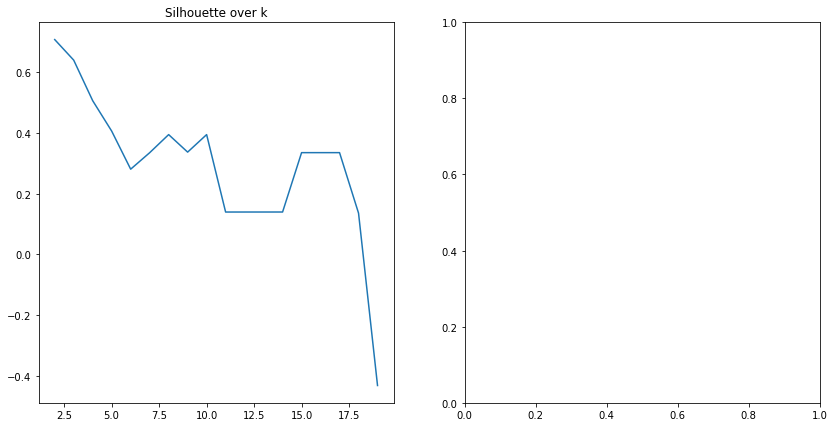

In [42]:
# lineplot

fig, axes = plt.subplots(1, 2, figsize=(14,7))
axes[0].plot(scores_df.k, scores_df.silhouette)
axes[0].set_title("Silhouette over k");

#### DBSCAN

In [66]:
# fit df['text_clean'] again to CountVectorizer

X = cv.fit_transform(df['text_clean'])

# instantiate StandardScaler and fit X

sc = StandardScaler(with_mean = False)
X = sc.fit_transform(X)

In [96]:
# find the best eps

scores = []

for eps in np.arange(1000.1, 1020.2, 40.0):
    
    # do the clustering
    db = DBSCAN(eps = eps, min_samples = 5_000)
    db.fit(X)
    
    # get our silhouette score
    sil = silhouette_score(X, db.labels_)
    
    # append to a list
    scores.append((eps, sil))
    
# ran this cell multiple times in small sections, 0.1 to 100, 400 to 600, then 900 to 1100
# this model started giving me an error once epsilon got to 1000 and when min_samples was increased
# takes a lot of time to find the best epsilon

In [97]:
# create a dataframe

scores_df = pd.DataFrame(scores, columns = ['eps', 'silhouette'])
scores_df

# best silhouette score: epsillon = 1000.1, min_samples = 5000, score = 0.742022

,eps,silhouette
0,1000.1,0.742022


### TfidfVectorizer()

#### KMeans

In [43]:
# instantiate TfidfVectorizer and fit df['text_clean']

tv = TfidfVectorizer()
X = tv.fit_transform(df['text_clean'])

In [44]:
# instantite StandardScaler and fit X

sc = StandardScaler(with_mean = False)
X = sc.fit_transform(X)

In [45]:
# find the best k

scores = []

for k in range(2, 20):
    
    # do the clustering
    km = KMeans(n_clusters = k, random_state = 2020)
    km.fit(X)
    
    # get our silhouette score
    sil = silhouette_score(X, km.labels_)
    
    # append to a list
    scores.append((k, sil))

In [46]:
# create a dataframe

scores_df = pd.DataFrame(scores, columns = ['k', 'silhouette'])
scores_df.head()

,k,silhouette
0,2,0.512033
1,3,0.493372
2,4,0.205892
3,5,0.205919
4,6,0.205929


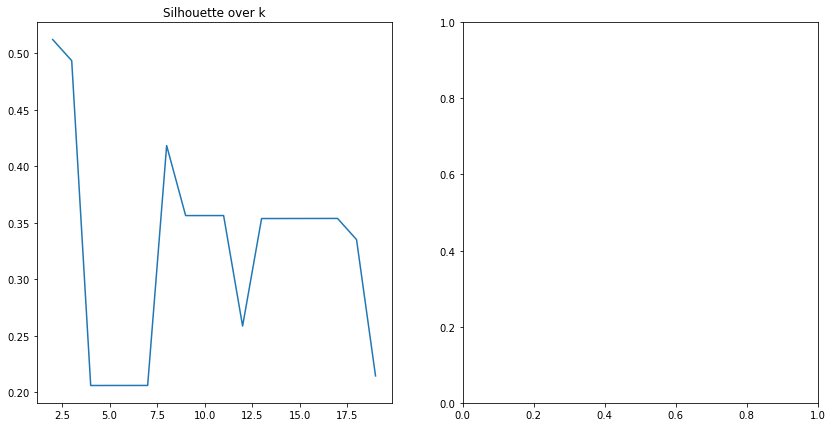

In [47]:
# lineplot

fig, axes = plt.subplots(1, 2, figsize=(14,7))
axes[0].plot(scores_df.k, scores_df.silhouette)
axes[0].set_title("Silhouette over k");

### word2vec

In [99]:
# import gensim and create a model to vectorize the words

import gensim

file_path = '/Users/juhee/Desktop/GA/08-week/8.05-lesson-word-vectors/lexvec.enwiki+newscrawl.300d.W.pos.vectors'

model = gensim.models.KeyedVectors.load_word2vec_format(file_path)

In [100]:
## code taken from https://github.com/susanli2016/NLP-with-Python/blob/master/Text%20Classification%20model%20selection.ipynb

model.init_sims(replace = True)

In [101]:
from itertools import islice
list(islice(model.vocab, 13030, 13050))

['bal',
 'harley',
 'proponents',
 'escalating',
 'madeleine',
 'crushing',
 'yielded',
 'understandable',
 'agnes',
 'victorious',
 'rockefeller',
 'deeds',
 'jude',
 'doomed',
 'sundays',
 'rejecting',
 'prep',
 'concession',
 'leopold',
 'dislike']

In [102]:
import logging

In [114]:
# average word vectors

def word_averaging(model, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in model.vocab:
            mean.append(model.syn0norm[model.vocab[word].index])
            all_words.add(model.vocab[word].index)
            
    if not mean:
        logging.warning('cannot compute similarity with no input %s', words)
        return np.zeros(model.vector_size, )
    
    mean = gensim.matutils.unitvec(np.array(mean).mean(axis = 0)).astype(np.float32)
    
    return mean

def word_averaging_list(model, text_list):
    return np.vstack([word_averaging(model, tweet) for tweet in text_list])

In [104]:
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language = 'english'):
        for word in nltk.word_tokenize(sent, language = 'english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens

In [136]:
train, test = train_test_split(df[['label', 'text']], test_size = 0.3, random_state = 42)

test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['text']), axis = 1).values
train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['text']), axis = 1).values

In [ ]:
X_train_word_average = word_averaging_list(model, train_tokenized)
X_test_word_average = word_averaging_list(model, test_tokenized)

# a lot of warnings - clear the output

In [138]:
# support vector machine

svc = SVC()
svc = svc.fit(X = X_train_word_average, y = train['label'])
y_pred = svc.predict(X_test_word_average)

In [139]:
print('accuracy %s' % accuracy_score(y_pred, test['label']))

accuracy 0.933466689859106


In [140]:
from sklearn.metrics import classification_report

print(classification_report(test['label'], y_pred, target_names = my_labels))

               precision    recall  f1-score   support

   earthquake       0.90      0.97      0.93      5618
no-earthquake       0.97      0.90      0.93      5880

     accuracy                           0.93     11498
    macro avg       0.94      0.93      0.93     11498
 weighted avg       0.94      0.93      0.93     11498



In [141]:
# logistic regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg = logreg.fit(X_train_word_average, train['label'])

y_pred = logreg.predict(X_test_word_average)

In [142]:
print('accuracy %s' % accuracy_score(y_pred, test['label']))

print(classification_report(test['label'], y_pred, target_names = my_labels))

accuracy 0.9209427726561141
               precision    recall  f1-score   support

   earthquake       0.90      0.94      0.92      5618
no-earthquake       0.94      0.90      0.92      5880

     accuracy                           0.92     11498
    macro avg       0.92      0.92      0.92     11498
 weighted avg       0.92      0.92      0.92     11498

